In [1]:
import matplotlib.pyplot as plt
import scipy.integrate as sp
import numpy as np
import pysindy as ps




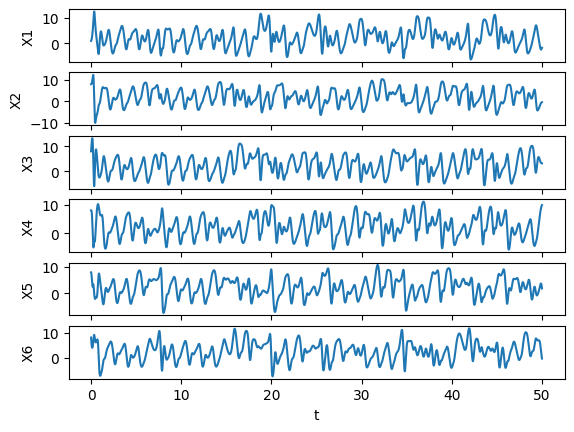

In [2]:
# Step 1: Generate data
def lorenz96(t, y, F):
    y1, y2, y3, y4, y5, y6 = y
    dy = [
        (y2-y5)*y6 - y1 + F,
        (y3-y6)*y1 - y2 + F,
        (y4-y1)*y2 - y3 + F,
        (y5-y2)*y3 - y4 + F,
        (y6-y3)*y4 - y5 + F,
        (y1-y4)*y5 - y6 + F,
    ]
    return dy

dt = 0.001
t = np.arange(0, 50, dt)

X0 = [1, 8, 8, 8, 8, 8]

F = 8

X = sp.odeint(lambda t, y: lorenz96(t, y, F), X0, t, tfirst=True)
n = X.shape[1]

# plot orbit
plt.ion()
plt.figure()

for i in range(0, n):
    plt.subplot(n, 1, i+1)
    plt.plot(t, X[:, i])
    plt.ylabel('X'+str(i+1))
    
    if i < n-1: 
        plt.tick_params(axis='x', labelbottom=False)

plt.xlabel('t')
plt.show()

# Step 1: Using finite differences to obtain the derivative matrix. | Mainly used for noise-free orbits.
differentiation_method = ps.FiniteDifference(order=2)


In [3]:
# Step 2: Build basis library
feature_library = ps.PolynomialLibrary(degree=3)


In [4]:
# Step 3: Solve
optimizer = ps.STLSQ(threshold=0.2)

model = ps.SINDy(
    differentiation_method=differentiation_method,
    feature_library=feature_library,
    optimizer=optimizer,
    feature_names=["x1", "x2", "x3", "x4", "x5", "x6"],
)

model.fit(X, t=t)

model.print()

(x1)' = 8.000 1 + -1.000 x1 + 1.000 x2 x6 + -1.000 x5 x6
(x2)' = 8.000 1 + -1.000 x2 + 1.000 x1 x3 + -1.000 x1 x6
(x3)' = 8.000 1 + -1.000 x3 + -1.000 x1 x2 + 1.000 x2 x4
(x4)' = 8.000 1 + -1.000 x4 + -1.000 x2 x3 + 1.000 x3 x5
(x5)' = 8.000 1 + -1.000 x5 + -1.000 x3 x4 + 1.000 x4 x6
(x6)' = 8.000 1 + -1.000 x6 + 1.000 x1 x5 + -1.000 x4 x5


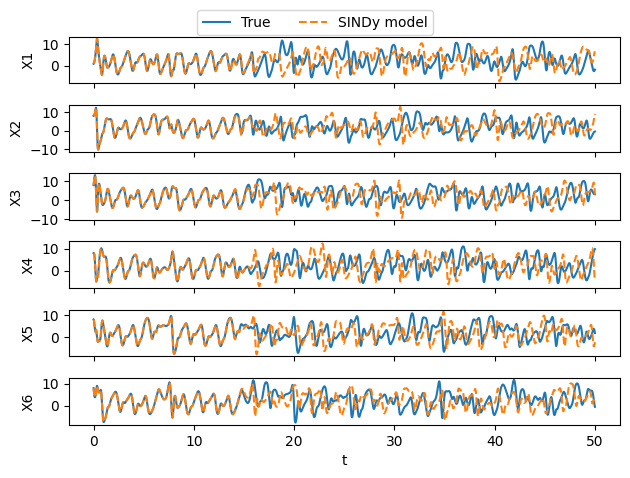

In [5]:
#Step 4: Evaluate

# x0, y0, z0 = X0
sim = model.simulate(X0, t=t)

# plot orbit
plt.ion()

fig = plt.figure()
for i in range(0, n):
    plt.subplot(n, 1, i+1)
    plt.plot(t, X[:, i], label='True')
    plt.plot(t, sim[:, i], '--', label='SINDy model')

    if i < n-1: 
        plt.tick_params(axis='x', labelbottom=False)
    plt.ylabel('X'+str(i+1))

plt.xlabel('t')

handles, labels = plt.gca().get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1), ncol=2)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()
